<img src = "https://drive.google.com/uc?export=view&id=1ljiY7gV0TKs3nnTMPA5UBdED8KGzzZnX" alt = "Encabezado MLDS" width = "100%">  </img>

## **1. Marco de Proyecto**
---

### **1.1. Trasfondo del Negocio**
---
El presente proyecto se sitúa en el dominio del mercado inmobiliario con un enfoque específico en la economía colaborativa, más concretamente en el análisis de datos de la plataforma Airbnb en la ciudad de Londres. Los beneficiarios directos del proyecto son:

* Propietarios y anfitriones de inmuebles que desean optimizar sus precios de alquiler.

* Empresas de gestión de propiedades o marketing inmobiliario interesadas en modelos predictivos de precios.

* Posibles inversores que buscan comprender qué características influyen más en la rentabilidad de un inmueble.

El principal desafío que motiva este análisis es la variabilidad de los precios de alquiler en Airbnb, influenciada por factores como la ubicación, número de habitaciones, tipo de alojamiento, entre otros. La dificultad de establecer un precio competitivo e ideal sin una base analítica sólida hace que este proyecto sea necesario.

### **1.2. Alcance**
---

* Solución propuesta: Desarrollar un análisis exploratorio de datos (EDA) y un modelo predictivo que permita identificar las características más influyentes en el precio de los alojamientos y predecir el precio ideal de un inmueble en Londres.

* Límites del proyecto:

  * Incluye: análisis de datos exclusivamente de Londres, procesamiento y limpieza de datos, análisis estadístico, visualización, construcción de un modelo de regresión o machine learning.

  * Excluye: datos de otras ciudades, integración directa con la plataforma Airbnb, análisis de reseñas textuales o imágenes.

* Uso del producto: El cliente o beneficiario podrá utilizar los resultados para:

  * Establecer estrategias de precios.

  * Tomar decisiones de inversión inmobiliaria.

  * Identificar mejoras que incrementen el valor del inmueble.

### **1.3. Plan**
---

Puede agregar una lista de actividades con tiempos estimados, un diagrama de Gantt o integrar alguna herramienta de gestión de proyectos para mostrar la planeación del proyecto como [*Jira*](https://www.atlassian.com/software/jira?&aceid=&adposition=&adgroup=144583570757&campaign=19313283508&creative=641924587890&device=c&keyword=jira%20software%20online&matchtype=p&network=g&placement=&ds_kids=p74602877891&ds_e=GOOGLE&ds_eid=700000001558501&ds_e1=GOOGLE&gad_source=1&gclid=CjwKCAiAqNSsBhAvEiwAn_tmxStBdySS6RxbLNGXE0tWTeJc32ffjQD_1EXZvH6hmQkYZm5bTa3sgBoCX3oQAvD_BwE&gclsrc=aw.ds) o [*Trello*](https://trello.com/?&aceid=&adposition=&adgroup=144675712219&campaign=19250238609&creative=641300630637&device=c&keyword=trello&matchtype=e&network=g&placement=&ds_kids=p74526213668&ds_e=GOOGLE&ds_eid=700000001557344&ds_e1=GOOGLE&gad_source=1&gclid=CjwKCAiAqNSsBhAvEiwAn_tmxWW7Gdzf0Szf-mA-piM2GPM7tk8R0HsgpBALLGHNFq1-2xXMQbxB1RoCs-sQAvD_BwE&gclsrc=aw.ds).

## **2. Datos**
---


### **2.1. Origen**
---

* Fuente: El conjunto de datos proviene de Kaggle, específicamente del dataset "Airbnb Price Determinants in Europe".

* Proceso de descarga: Se ha descargado manualmente desde la plataforma Kaggle.

* Tipo de datos:

  * Formato tabular (.csv o similar)

  * Contiene variables numéricas (precio, número de habitaciones), categóricas (tipo de alojamiento, vecindario), y posiblemente fechas y textos breves.


# **Entendimiento de los Datos**
---

Este notebook es una plantilla que le puede servir como guía para el segundo entregable del proyecto aplicado.

## **1. Carga de datos**
---
Proporcione únicamente el código de Python necesario para descargar el conjunto de datos que será utilizado en el proyecto. Si es necesario, realice operaciones de adquisición e integración del conjunto de datos.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
Airbnb=pd.read_csv('/content/london_weekdays.csv')
Airbnb.head(5)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,570.098074,Entire home/apt,False,False,2.0,False,0,0,10.0,98.0,1,5.301018,1.588990,209.632578,14.571793,467.597522,8.372724,-0.16032,51.46531
1,1,297.984430,Private room,False,True,2.0,True,1,0,10.0,99.0,1,2.198946,0.379262,553.891744,38.501630,961.472137,17.215961,-0.09683,51.50343
2,2,336.790611,Private room,False,True,2.0,False,1,0,10.0,96.0,1,2.322958,0.453178,428.287849,29.770764,959.042839,17.172462,-0.10554,51.52407
3,3,226.722171,Private room,False,True,2.0,True,1,0,10.0,99.0,1,5.707825,1.723977,195.694744,13.602959,452.232472,8.097600,-0.16575,51.46292
4,4,256.355982,Private room,False,True,3.0,False,0,0,9.0,98.0,1,3.257945,0.825417,329.477068,22.902317,735.327280,13.166649,-0.12055,51.53728


In [ ]:
# Lista de columnas a convertir
columnas_a_convertir = ['multi','biz']

Airbnb.drop(columns=["attr_index_norm","rest_index","attr_index","rest_index_norm","Unnamed: 0"],axis=1,inplace=True)

# Convertir esas columnas a booleano
Airbnb[columnas_a_convertir] = Airbnb[columnas_a_convertir].astype(bool)

## **2. Análisis Exploratorio de los Datos**
---


### **2.1. Resumen General**
---

- El DataSet elegido, tiene 4614 registros lo que corresponden a aprox 626 Kb de memoria y 938 kb en su formato CSV. Acontinuación detalle adicional

In [ ]:
Airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4614 entries, 0 to 4613
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     4614 non-null   float64
 1   room_type                   4614 non-null   object 
 2   room_shared                 4614 non-null   bool   
 3   room_private                4614 non-null   bool   
 4   person_capacity             4614 non-null   float64
 5   host_is_superhost           4614 non-null   bool   
 6   multi                       4614 non-null   bool   
 7   biz                         4614 non-null   bool   
 8   cleanliness_rating          4614 non-null   float64
 9   guest_satisfaction_overall  4614 non-null   float64
 10  bedrooms                    4614 non-null   int64  
 11  dist                        4614 non-null   float64
 12  metro_dist                  4614 non-null   float64
 13  lng                         4614 

Los siguientes son las columnas del dataframe de las cuales conocemos que es lo que representan.



| Column name                | Descripción                                                                                           | Tipo de dato  |
|---------------------------|--------------------------------------------------------------------------------------------------------|---------------|
| realSum                   | El precio total del alojamiento en Airbnb.                                                             | Numérico      |
| room_type                 | El tipo de habitación ofrecida (por ejemplo, habitación privada, compartida o alojamiento entero).     | Categórico    |
| room_shared               | Indica si la habitación es compartida o no.                                                            | Booleano      |
| room_private              | Indica si la habitación es privada o no.                                                               | Booleano      |
| person_capacity           | Número máximo de personas que puede alojar el anuncio.                                                 | Numérico      |
| host_is_superhost         | Indica si el anfitrión está identificado como superhost en Airbnb.                                     | Booleano      |
| multi                     | Indica si el anuncio ofrece múltiples habitaciones en una misma propiedad.                            | Booleano      |
| biz                       | Indica si el alojamiento ofrece instalaciones para negocios como salas de reuniones.                  | Booleano      |
| cleanliness_rating        | Calificación sobre la limpieza del alojamiento después de la estadía.                                  | Numérico      |
| guest_satisfaction_overall| Calificación general que muestra qué tan satisfechos estuvieron los huéspedes con su estadía.          | Numérico      |
| bedrooms                  | Cantidad total de dormitorios disponibles en la propiedad.                                             | Numérico      |
| dist                      | Distancia al centro de la ciudad. (La unidad puede variar, ej. kilómetros o millas)                    | Medición      |
| metro_dist                | Distancia a la estación de metro más cercana. (La unidad puede variar)                                 | Medición      |
| lng                       | Coordenada de longitud del alojamiento.                                                                | Numérico      |
| lat                       | Coordenada de latitud del alojamiento.                                                                 | Numérico      |

### **2.2. Análisis estadístico descriptivo**
---

Describiremos el conjunto de datos por medio de estadística descriptiva, aportando interpretaciones precisas que ayuden a entender los datos.

#### **2.2.1 Seccion 1: Resumen estadístico general**
---

In [ ]:
Airbnb.describe()

,realSum,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat
count,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000
mean,360.230348,2.832466,9.153013,90.324447,1.123754,5.325023,0.992739,-0.114886,51.503262
std,507.782888,1.240572,1.183012,11.755838,0.581591,2.720524,1.262465,0.068183,0.031465
min,64.676968,2.000000,2.000000,20.000000,0.000000,0.040553,0.013904,-0.251700,51.416510
25%,167.454550,2.000000,9.000000,86.000000,1.000000,3.553956,0.317995,-0.171242,51.486300
50%,256.355982,2.000000,9.000000,93.000000,1.000000,4.899843,0.523462,-0.118225,51.509800
75%,435.452386,4.000000,10.000000,99.000000,1.000000,6.835232,1.047957,-0.067260,51.524698
max,15499.894165,6.000000,10.000000,100.000000,8.000000,17.321206,9.286229,0.120180,51.575820


#### **2.2.2 Seccion 2: Distribución de la variable realSum**
---

Grafiquemos la distribución de la variable realsum/Precio del alojamiento de la siguiente manera

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

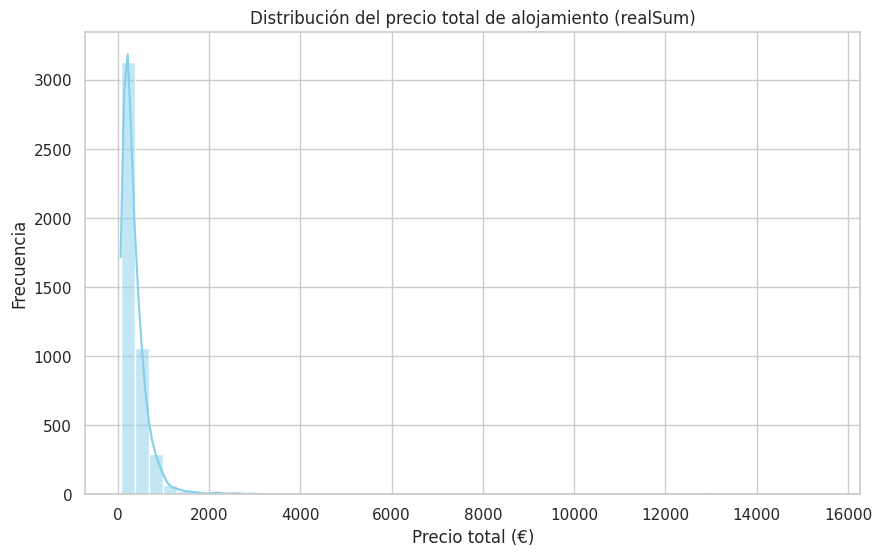

In [ ]:
sns.set(style="whitegrid")

# Crear histograma con curva de densidad
plt.figure(figsize=(10, 6))
sns.histplot(Airbnb['realSum'], kde=True, bins=50, color='skyblue')
plt.title('Distribución del precio total de alojamiento (realSum)')
plt.xlabel('Precio total (€)')
plt.ylabel('Frecuencia')
plt.show()

Notemos que segun la sección 1 la media de precios se debe encontrar alrrededor de los 360 euros, no obstante la desviación estandar es bastante alta, y esto se puede explicar debido a la precencia de valores atipicos. Parcen haber propiedades cuyo alquiler puede superar los 2000 euros con un máximo de 15499, no obstante gráficamente podemos notar que son una proporsión significativamente mínima.

Más adelante en este documento ahondaremos en estos valores atipicos y cual será su tratamiento.

Si filtramos los valores superiores a 1500 euros

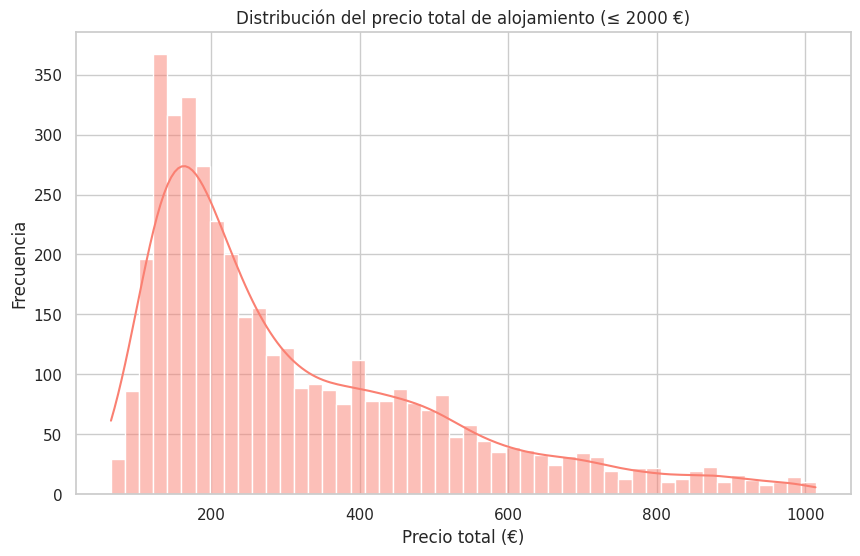

In [ ]:
desviacion=Airbnb["realSum"].std()
filtered_data=Airbnb.query(f"((realSum >= {-desviacion * 2}) and (realSum <= {desviacion * 2}))")
filtered_data=filtered_data[filtered_data['person_capacity'] >= filtered_data['bedrooms']]
filtered_data=filtered_data[filtered_data['bedrooms'] > 0]
# Crear la gráfica
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['realSum'], kde=True, bins=50, color='salmon')
plt.title('Distribución del precio total de alojamiento (≤ 2000 €)')
plt.xlabel('Precio total (€)')
plt.ylabel('Frecuencia')
plt.show()

Lo que tenemos es un claro ejemplo de una distribución sesgada positivamente donde a medida que el precio aumenta, la frecuencia disminuye de forma progresiva.
Así pues si usamos la media como medida de tendencia central sobrestimamos el precio "típico". La mediana es más representativa en este tipo de datos.

In [ ]:
mediana = filtered_data['realSum'].median()
print(f"La mediana del precio total (realSum) es: {mediana:.2f} €")

La mediana del precio total (realSum) es: 239.89 €


#### **2.2.3 Seccion 3: Tipos de alojamiento y su precio**

Grafiquemos los distintos tipos de alojamiento que se ofrecen y sus precios promedio de la siguiente manera

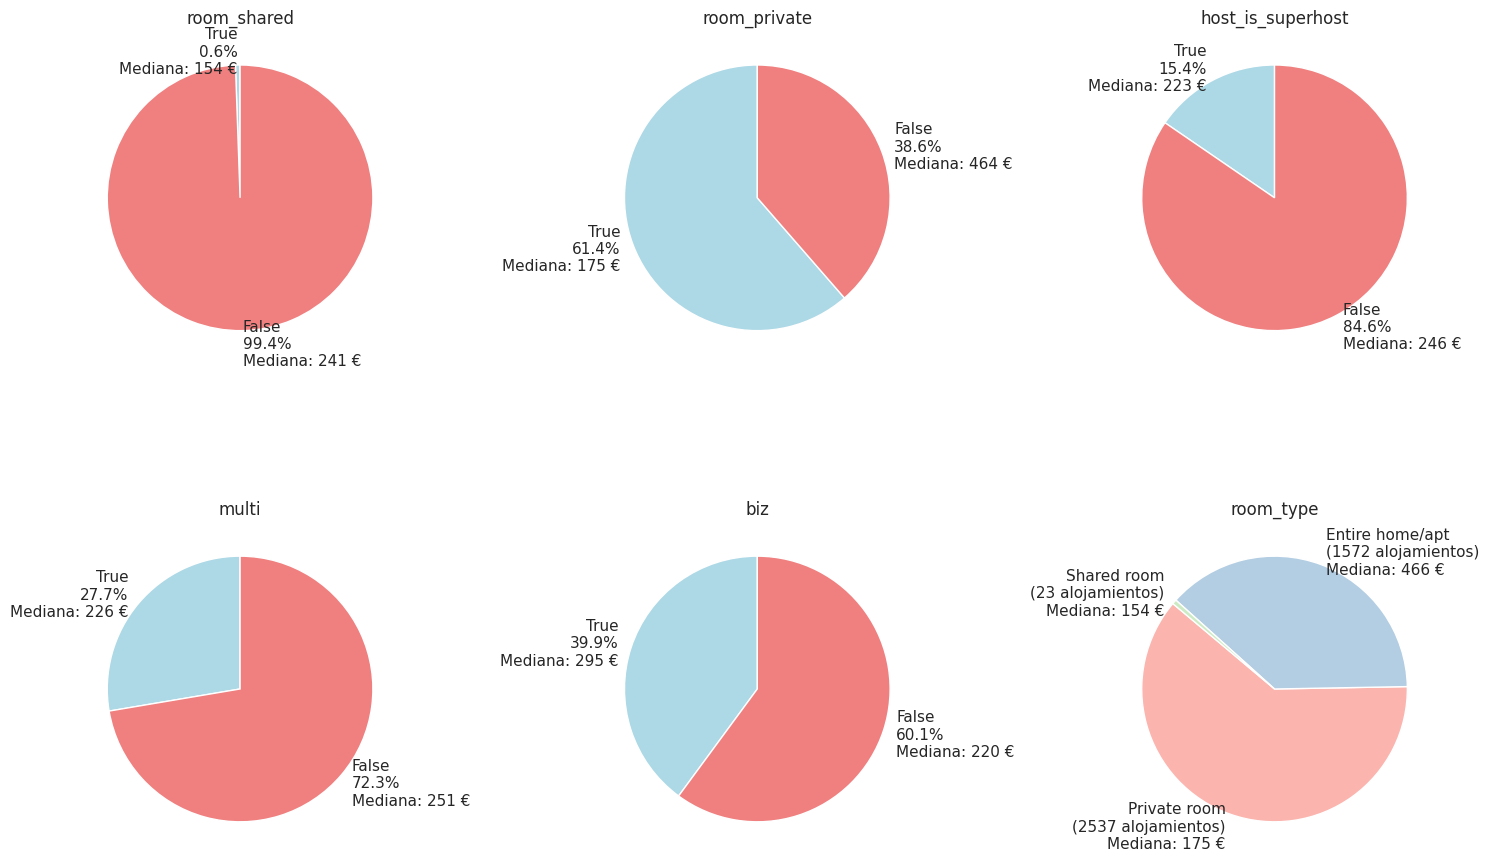

In [ ]:
# Filtrar variables booleanas
bool_cols = filtered_data.select_dtypes(include='bool').columns

# Configurar la figura para una matriz 2x3
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# === Gráficos de torta para variables booleanas ===
for i, col in enumerate(bool_cols):
    true_df = filtered_data[filtered_data[col]]
    false_df = filtered_data[~filtered_data[col]]

    true_count = len(true_df)
    false_count = len(false_df)
    total = true_count + false_count

    proportion_true = true_count / total
    proportion_false = false_count / total

    median_true = true_df['realSum'].median()
    median_false = false_df['realSum'].median()

    sizes = [proportion_true, proportion_false]
    labels = [
        f"True\n{proportion_true*100:.1f}%\nMediana: {median_true:.0f} €",
        f"False\n{proportion_false*100:.1f}%\nMediana: {median_false:.0f} €"
    ]

    ax = axes[i]
    ax.pie(sizes, labels=labels, colors=['lightblue', 'lightcoral'], startangle=90)
    ax.set_title(col)

# === Sexto gráfico: room_type ===
room_counts = filtered_data['room_type'].value_counts()
medians_room = filtered_data.groupby('room_type')['realSum'].median()

labels_room = [f"{room_type}\n({count} alojamientos)\nMediana: {medians_room[room_type]:.0f} €"
               for room_type, count in room_counts.items()]

ax = axes[5]  # Sexto subplot
ax.pie(room_counts, labels=labels_room, startangle=140, colors=plt.cm.Pastel1.colors)
ax.set_title('room_type')

# Ajustar el diseño final
plt.tight_layout()
plt.show()


De la representación anterior, podemos resaltar que a excepción del calificativo de "Super Host", todas estas variables parecen impactar directamente el valor del alquiler del lugar y deberan ser tenidas en cuenta para nuestro analisis.

#### **2.2.4 Seccion 4: Capacidad del alojamiento y su precio**

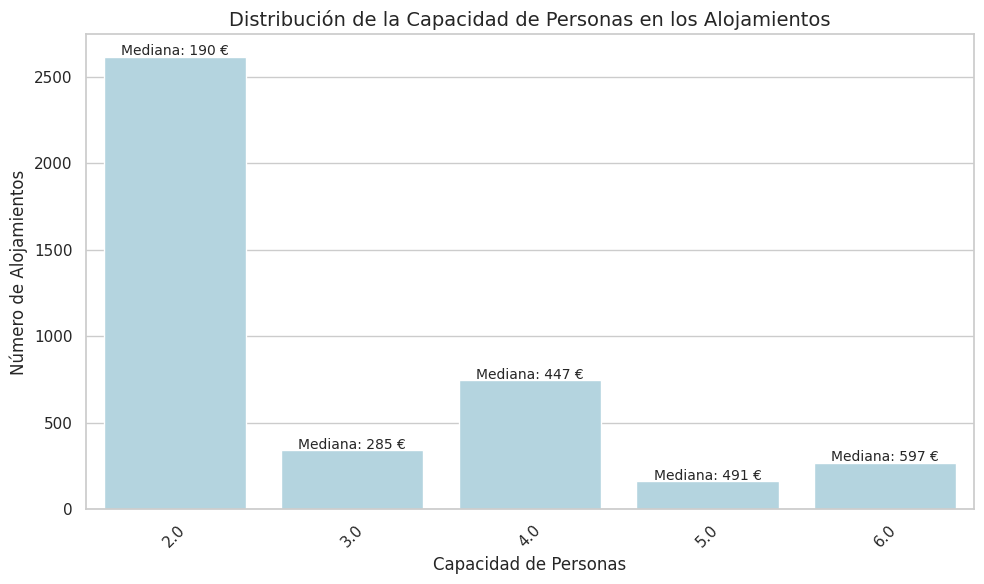

In [ ]:
# Contamos los valores únicos de 'person_capacity'
capacity_counts = filtered_data['person_capacity'].value_counts().sort_index()

# Calcular la mediana de 'realSum' para cada valor de 'person_capacity'
median_price_by_capacity = filtered_data.groupby('person_capacity')['realSum'].median()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=capacity_counts.index, y=capacity_counts.values, color='lightblue')

# Agregar las medianas como etiquetas sobre cada barra
for i, capacity in enumerate(capacity_counts.index):
    median = median_price_by_capacity[capacity]
    plt.text(i, capacity_counts[capacity] + 10, f'Mediana: {median:.0f} €', ha='center', fontsize=10)

# Títulos y etiquetas
plt.title('Distribución de la Capacidad de Personas en los Alojamientos', fontsize=14)
plt.xlabel('Capacidad de Personas', fontsize=12)
plt.ylabel('Número de Alojamientos', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Aunque la mayoria de alojamientos son para parejas, como es de esperarce la cantidad de personas que se pueden alojar es directamente proporcional al precio del lugar

#### **2.2.5 Seccion 5: Número de habitaciones del alojamiento y su precio**

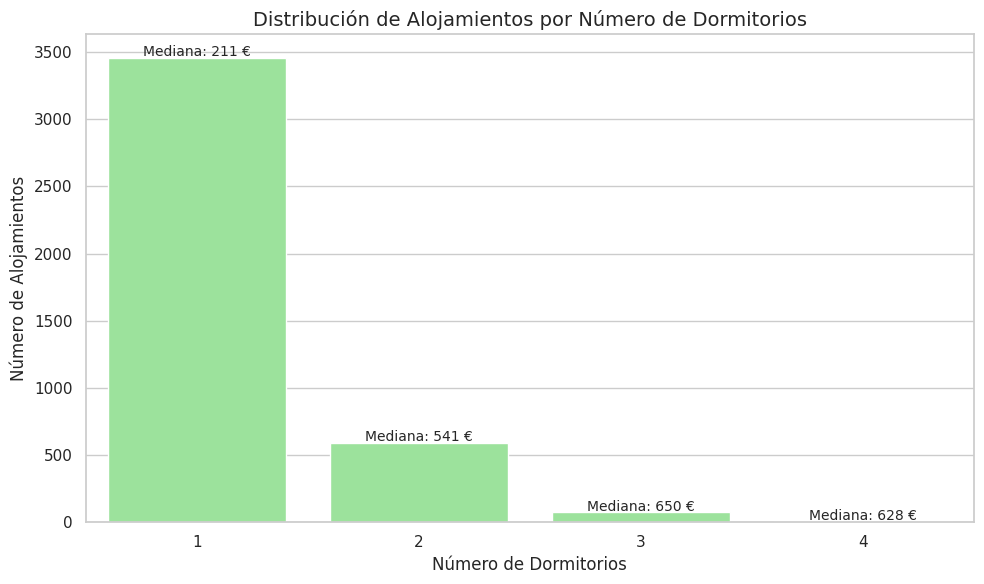

In [ ]:
# Contar cuántos alojamientos hay por cantidad de dormitorios
bedroom_counts = filtered_data['bedrooms'].value_counts().sort_index()

# Calcular la mediana del precio para cada cantidad de dormitorios
median_price_by_bedroom = filtered_data.groupby('bedrooms')['realSum'].median()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=bedroom_counts.index, y=bedroom_counts.values, color='lightgreen')

# Agregar etiquetas con la mediana de precios sobre cada barra
for i, bedroom in enumerate(bedroom_counts.index):
    median = median_price_by_bedroom[bedroom]
    plt.text(i, bedroom_counts[bedroom] + 10, f'Mediana: {median:.0f} €', ha='center', fontsize=10)

# Títulos y etiquetas
plt.title('Distribución de Alojamientos por Número de Dormitorios', fontsize=14)
plt.xlabel('Número de Dormitorios', fontsize=12)
plt.ylabel('Número de Alojamientos', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Dentro de los aspectos a remarcar
* Parece haber un volumen importante de alojamientos sin habitaciones, podria tratarse de datos erroneos candidatos a limpieza o de un alojamiento particular como una oficina. Se analizará a mayor detalle más adelante en este documento
* La mayor oferta de alojamientos cosnta de una única habitación
* Es interesante notar como un número mayor de habitaciones no suele traducirce en un mayor precio

#### **2.2.6 Seccion 6: Calificaciones del alojamiento y su precio**

<ipython-input-21-950258614>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  satis_medians = Airbnb_clean.groupby('satisfaction_binned')['realSum'].median()


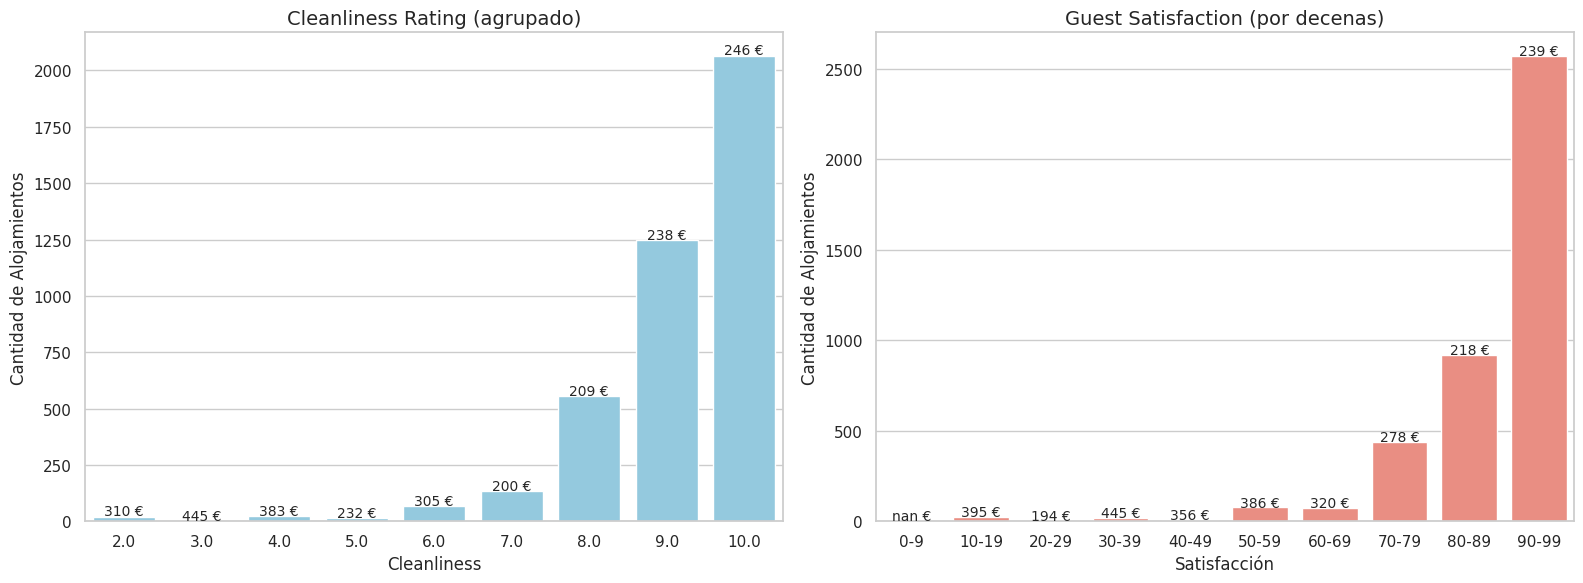

In [ ]:
# Asegurarnos de que los datos no tienen NaN antes de agrupar
Airbnb_clean = filtered_data.dropna(subset=['cleanliness_rating', 'guest_satisfaction_overall', 'realSum'])

# Redondear cleanliness a múltiplos de 0.5
Airbnb_clean['cleanliness_rounded'] = (Airbnb_clean['cleanliness_rating'] * 2).round() / 2

# Agrupar guest_satisfaction en bins de 10
bins = range(0, 110, 10)
labels = [f"{i}-{i+9}" for i in bins[:-1]]
Airbnb_clean['satisfaction_binned'] = pd.cut(
    Airbnb_clean['guest_satisfaction_overall'],
    bins=bins, labels=labels, include_lowest=True
)

# Contar y calcular medianas para cada grupo
clean_counts = Airbnb_clean['cleanliness_rounded'].value_counts().sort_index()
satis_counts = Airbnb_clean['satisfaction_binned'].value_counts().sort_index()

clean_medians = Airbnb_clean.groupby('cleanliness_rounded')['realSum'].median()
satis_medians = Airbnb_clean.groupby('satisfaction_binned')['realSum'].median()

# Crear la figura
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# === Gráfico 1 ===
sns.barplot(x=clean_counts.index.astype(str), y=clean_counts.values, color='skyblue', ax=axes[0])
axes[0].set_title('Cleanliness Rating (agrupado)', fontsize=14)
axes[0].set_xlabel('Cleanliness', fontsize=12)
axes[0].set_ylabel('Cantidad de Alojamientos', fontsize=12)
for i, val in enumerate(clean_counts.index):
    median = clean_medians[val]
    axes[0].text(i, clean_counts[val] + 5, f'{median:.0f} €', ha='center', fontsize=10)

# === Gráfico 2 ===
sns.barplot(x=satis_counts.index.astype(str), y=satis_counts.values, color='salmon', ax=axes[1])
axes[1].set_title('Guest Satisfaction (por decenas)', fontsize=14)
axes[1].set_xlabel('Satisfacción', fontsize=12)
axes[1].set_ylabel('Cantidad de Alojamientos', fontsize=12)
for i, val in enumerate(satis_counts.index):
    median = satis_medians[val]
    axes[1].text(i, satis_counts[val] + 5, f'{median:.0f} €', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


Aparentemente las calificaciones de los alojamientos no influencian mucho el valor del alquiler, no obstante esto va un poco en contra de lo que se espera. Por lo tanto valdra la pena analizar si existen valores atipicos que puedan estar afectando la estadistica.

#### **2.2.7 Seccion 7: Distancia del alojamiento a puntos estratégicos y su precio**

<ipython-input-22-405638965>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dist_medians = Airbnb_dist.groupby('dist_group')['realSum'].median()
<ipython-input-22-405638965>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  metro_medians = Airbnb_dist.groupby('metro_group')['realSum'].median()


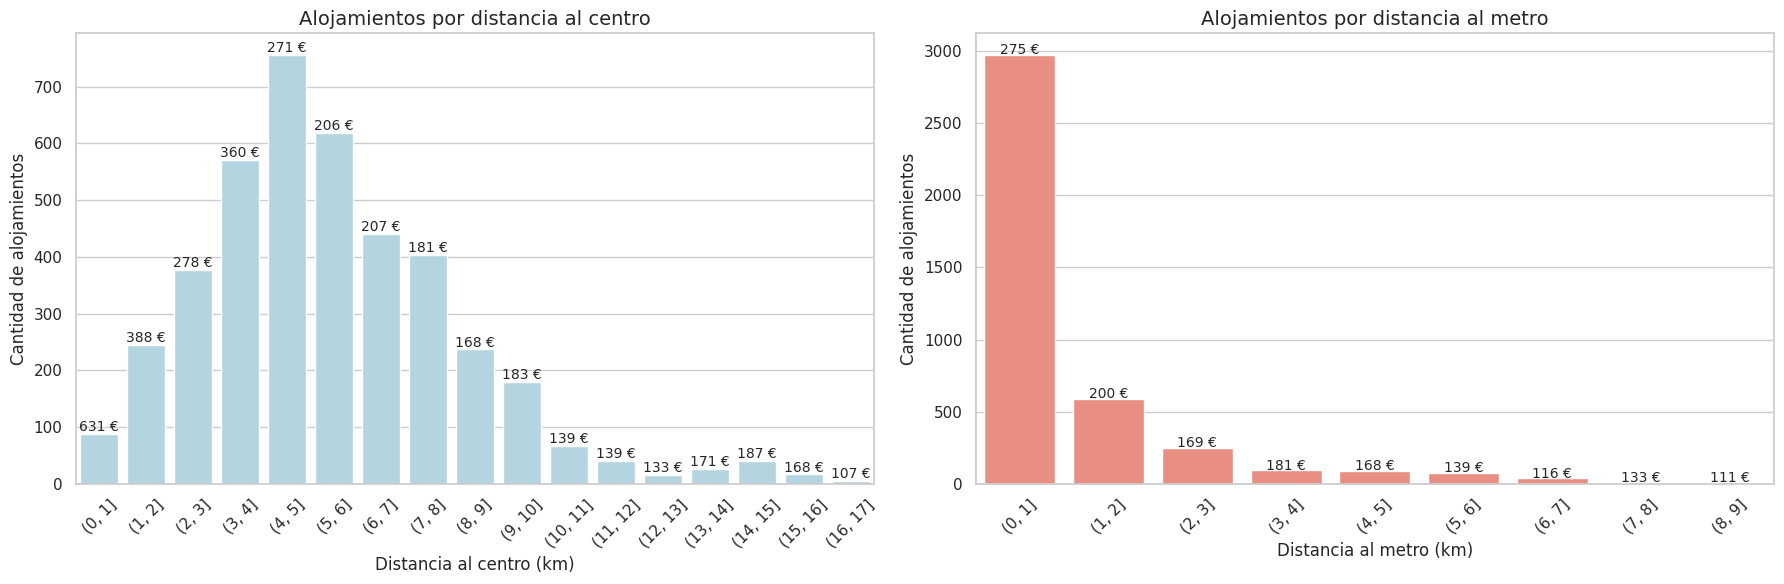

In [ ]:
# Asegurar que no hay NaN en las columnas necesarias
Airbnb_dist = filtered_data.dropna(subset=['dist', 'metro_dist', 'realSum'])

# Agrupar ambas distancias en tramos de 1 km (hasta 20 km)
Airbnb_dist['dist_group'] = pd.cut(Airbnb_dist['dist'], bins=range(0, 18, 1))
Airbnb_dist['metro_group'] = pd.cut(Airbnb_dist['metro_dist'], bins=range(0, 10, 1))

# Obtener conteos y medianas para cada grupo
dist_counts = Airbnb_dist['dist_group'].value_counts().sort_index()
metro_counts = Airbnb_dist['metro_group'].value_counts().sort_index()

dist_medians = Airbnb_dist.groupby('dist_group')['realSum'].median()
metro_medians = Airbnb_dist.groupby('metro_group')['realSum'].median()

# Crear figura con dos gráficos
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)

# === Gráfico 1: Distancia al centro ===
sns.barplot(x=dist_counts.index.astype(str), y=dist_counts.values, color='lightblue', ax=axes[0])
axes[0].set_title('Alojamientos por distancia al centro', fontsize=14)
axes[0].set_xlabel('Distancia al centro (km)', fontsize=12)
axes[0].set_ylabel('Cantidad de alojamientos', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
for i, val in enumerate(dist_counts.index):
    axes[0].text(i, dist_counts[val] + 5, f'{dist_medians[val]:.0f} €', ha='center', fontsize=10)

# === Gráfico 2: Distancia al metro ===
sns.barplot(x=metro_counts.index.astype(str), y=metro_counts.values, color='salmon', ax=axes[1])
axes[1].set_title('Alojamientos por distancia al metro', fontsize=14)
axes[1].set_xlabel('Distancia al metro (km)', fontsize=12)
axes[1].set_ylabel('Cantidad de alojamientos', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
for i, val in enumerate(metro_counts.index):
    axes[1].text(i, metro_counts[val] + 5, f'{metro_medians[val]:.0f} €', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


La distancia al metro y al centro de la ciudad son claros determinantes del precio del alquiler

#### **2.2.8 Seccion 8: Ubicación del alojamiento y su precio**

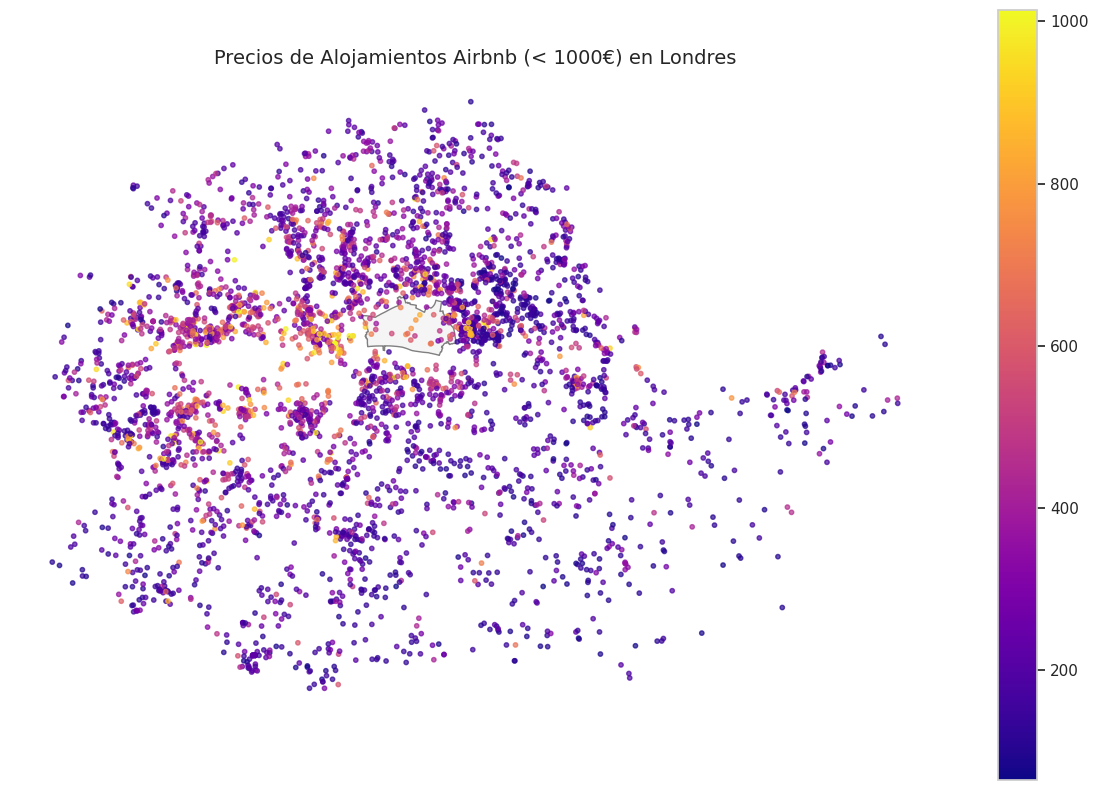

In [ ]:
#codigo mapa

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import os
# # 1. Leer datos espaciales del mapa
# london = gpd.read_file('/content/MapInfo')

# 2. Filtrar alojamientos con precio menor a 1500
airbnb_filtrado = filtered_data

# 1. Leer el shapefile de la Ciudad de Londres
shapefile_path = '/content/drive/MyDrive/universidad_nacional/Airbnb_global/msoa2021/City of London.shp'
london = gpd.read_file(shapefile_path)



# 3. Convertir a GeoDataFrame
geometry = [Point(xy) for xy in zip(airbnb_filtrado['lng'], airbnb_filtrado['lat'])]
airbnb_gdf = gpd.GeoDataFrame(airbnb_filtrado, geometry=geometry, crs='EPSG:4326')


# 4. Asegurar que ambos mapas tengan el mismo sistema de coordenadas
if london.crs != airbnb_gdf.crs:
    airbnb_gdf = airbnb_gdf.to_crs(london.crs)

# 5. Graficar
fig, ax = plt.subplots(figsize=(15, 10))
london.plot(ax=ax, color='whitesmoke', edgecolor='gray')

scatter = airbnb_gdf.plot(
    ax=ax,
    column='realSum',
    cmap='plasma',
    legend=True,
    markersize=10,
    alpha=0.7
)

plt.title('Precios de Alojamientos Airbnb (< 1000€) en Londres', fontsize=14)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.axis('off')
plt.show()

Notece como la cercania a los lugares más turisticos de la ciudad elevan el precio del alquiler. En el caso de Londres coincide con el centro de la ciudad y por lo tanto las variables latitud longitud se muestran un poco redundantes informativamente contando ya con la variable distancia al centro de la ciudad.

### **2.3. Resumen de la Calidad de los datos**
---

- *¿Se detecta la ausencia de datos, la presencia de datos erróneos o la existencia de datos de baja calidad en el conjunto?*
  - Este dataset no cuenta con valores nulos. y no se identificaron datos de baja calidad
- ¿Se identifican registros con datos ilegibles o con dificultades de codificación durante la revisión del conjunto de datos?
  - N/A
- ¿Se observa una diversidad de formatos en el conjunto de datos que pueda dificultar su consistencia o comprensión?
  - Fue necesario cambiar el tipo de dato de las columnas multi y biz que aunque representaban valores booleanos, estaban representados como enteros 0 y 1. Ahora toman valores True y False
- ¿Se identificaron y abordaron posibles problemas, como valores atípicos, duplicados o datos faltantes?
  - No hay manera de identificar si existen valores duplicados en el dataset, ya que incluso cuando 2 filas tengan exaxtamente los mismos valores en todos sus campos incluyendo la ubicación, deberiamos asumir que son dos propiedades distintas en un mismo edificio con un mismo dueño. No hay un identificador unico del inmueble en los campos disponibles.
  - En cuanto a los valores atipicos, en la sección 2 se identificaron inmuebles cuyo alquiler supera los 1500 dolares, estos pueden ser inmuebles de alto lujo que no necesariamente nos interesa estudiar en este proyecto.
  - Otro valor atipico con los alojamientos sin habitaciones, sospechamos que puede tratarse de una destinación empresarial pero se debera ahondar más adelante en este documento.

### **2.4. Tipos de variables**
---

- ¿El conjunto de datos tiene una variable objetivo a estimar?, de ser así, ¿es una variable continúa o categórica?
- Analice la distribución de las etiquetas, identifique si hay desbalanceo de datos.

Nuestra variable a estimar es el precio del inmueble, la cual es una variable numérica continua que por lo expuesto anteiormente paraece estar influenciada tanto por variables tanto númericas como su ubicación, como por variables categóricas como el tipo de habitación o la cantidad de huespedes.

# **Preparación de los datos**
---

## **1. Limpieza de los Datos**
---

Ya que nuestro data set no cuenta con valores faltantes, duplicados o corruptos. Nuestro analisis se reduce a estudiar valores atipicos e inconsistentes

### **1.2. Datos Atipicos**
---


#### ***Rentas superiores a 1000 Euros***

---
Como se expuso en la sección 2 existen valores atipicos de inmuebles que superan los 1000 Euros vamos a estudiar esta población para entender su valor para la muestra o en su defecto descartarlos

**¿Cuantos son?**

In [ ]:
n_caros = Airbnb[Airbnb['realSum'] > 1000].shape[0]
n_total = Airbnb.shape[0]
porcentaje = (n_caros / n_total) * 100
print(f"Son {n_caros} alojamientos, lo que corresponde al {porcentaje:.2f}% del total de la muestra.")


Son 126 alojamientos, lo que corresponde al 2.73% del total de la muestra.


Son realmente pocos los alojamientos con precios superiores a 1500 €, y partiendo de la hipótesis de que estos podrían representar propiedades de alto lujo, podemos intentar demostrarlo a través de un análisis comparativo.

Una característica clave del lujo es que muchas veces su valor no se basa en atributos objetivos, sino en percepciones subjetivas. Por lo tanto, si logramos mostrar que estos alojamientos tienen precios significativamente más altos sin que exista una diferencia proporcional en atributos objetivos —como la ubicación o la capacidad—, podríamos concluir que su elevado precio se justifica por un valor subjetivo. Esto los clasificaría como alojamientos de lujo.

Entre los factores que, según nuestro análisis previo, tienen una clara influencia objetiva en el precio son la ubicación del alojamiento y su capacidad: es decir, su cercanía al centro de la ciudad,estaciones de metro y la cantidad de personas que puede alojar

Por tanto, si encontramos que los alojamientos caros no difieren significativamente en estos aspectos respecto al resto, pero aun así su precio es muy superior, tendremos evidencia para considerar que esta subpoblación representa alojamientos de lujo, definidos por características intangibles o exclusividad.

Vamos a poner a prueba esta hipótesis de la siguiente manera:
Detectemos los valores medios de los atributos mencionados anteriormente en la población de alojamientos "Caros" y revisemos si existen alojamientos en la población de alojamientos con precios "normales" que tengan las mismas caracteristicas pero con un precio tipico:

In [ ]:
# 1. Subconjuntos
caros = Airbnb[Airbnb['realSum'] > 1000]
normales = Airbnb[Airbnb['realSum'] <= 1000]

# 2. Calcular medias de características clave en caros
medias_caros = caros[['dist', 'metro_dist', 'person_capacity']].mean()

# 3. Definir tolerancia (por ejemplo ±20%)
tolerancia = 0.2

# 4. Filtrar normales que están dentro de ese rango
similares = normales[
    (normales['dist'].between(medias_caros['dist'] * (1 - tolerancia), medias_caros['dist'] * (1 + tolerancia))) &
    (normales['metro_dist'].between(medias_caros['metro_dist'] * (1 - tolerancia), medias_caros['metro_dist'] * (1 + tolerancia))) &
    (normales['person_capacity'].between(medias_caros['person_capacity'] * (1 - tolerancia), medias_caros['person_capacity'] * (1 + tolerancia)))
]

# 5. Comparar precios
print(f"Alojamientos caros: {caros.shape[0]}")
print(f"Alojamientos normales similares: {similares.shape[0]}")
print(f"Media de precios en similares: {similares['realSum'].mean():.2f} €")
print(f"Media de precios en caros: {caros['realSum'].mean():.2f} €")


Alojamientos caros: 126
Alojamientos normales similares: 32
Media de precios en similares: 520.02 €
Media de precios en caros: 2033.77 €


En efeco existen Alojamientos con las mismas caracteristicas que ofrece la población que ahora sabemos son inmuebles de lujo pero con precios tipicos.

El precio de los inmuebles de Lujo se mide en base a caracteristicas subjetivas que no estamos midiendo en nuestra muestra y por lo tanto deben ser excluidos del estudio. Para su exclución utilizaremos el metodo de la depuración de los airbnb con precios superiores a 2 desviaciones estandar

### **1.3. Datos corruptos**
---


#### ***Datos con Habitaciones en cero***

---

In [ ]:
Sin_hab=Airbnb.loc[Airbnb['bedrooms'] == 0]
for col in Sin_hab.columns:
    print(f"Valores únicos en '{col}':")
    print(Airbnb[col].unique())
    print("-" * 40)

Valores únicos en 'realSum':
[570.0980738  297.98443049 336.79061126 ... 374.8912251  372.30414638
 573.15553047]
----------------------------------------
Valores únicos en 'room_type':
['Entire home/apt' 'Private room' 'Shared room']
----------------------------------------
Valores únicos en 'room_shared':
[False  True]
----------------------------------------
Valores únicos en 'room_private':
[False  True]
----------------------------------------
Valores únicos en 'person_capacity':
[2. 3. 4. 6. 5.]
----------------------------------------
Valores únicos en 'host_is_superhost':
[False  True]
----------------------------------------
Valores únicos en 'multi':
[False  True]
----------------------------------------
Valores únicos en 'biz':
[False  True]
----------------------------------------
Valores únicos en 'cleanliness_rating':
[10.  9.  8.  4.  7.  2.  6.  5.  3.]
----------------------------------------
Valores únicos en 'guest_satisfaction_overall':
[ 98.  99.  96. 100.  95.  93

Según lo obtenido en el numeral 2.2.5 sección 5, el valor 0 en la variable ``` bedrooms ``` podría indicar un dato mal cargado, ya que si consideramos como 1 dormitorio de una solo ambiente, para la variable ``` room_type ``` nos sigue presentando variables categoricas ['Entire home/apt' 'Private room' 'Shared room'], indicando que no existe un comportamiento que asocie esta caracteristica con un modelo de alojamiento especial.

De igual manera la variable ``` biz ``` que indica si es un alojamiento de tipo comercial, no lo define complletamente como tal sino que aparece con True o False.

En cuanto a si es ``` room_private ``` verdadero en estos casos, lo cual no es posible tener habitaciones privadas si no se reporta ningún dormitorio

Se podría considerar eliminar los registros con ``` bedrooms==0 ``` ya que para el estudio se considera que al menos una parte de los valores son erroneos o registros incompletos.



```
# Tiene formato de código
```

#### ***Capacidad menor que habitaciones***

---

In [ ]:
Hab458=Airbnb[Airbnb['bedrooms'] >= 4]
correlation = Hab458[['bedrooms', 'realSum']].corr()
print(correlation)

          bedrooms   realSum
bedrooms  1.000000 -0.142312
realSum  -0.142312  1.000000


In [ ]:
Hab58=Airbnb[Airbnb['bedrooms'] >= 5]
correlation = Hab58[['bedrooms', 'realSum']].corr()
print(correlation)
Hab58.describe()
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='bedrooms', y='realSum', data=Hab58, hue='person_capacity')
# plt.title('Precio por número de habitaciones y tipo de habitación')
# plt.xlabel('Número de habitaciones')
# plt.ylabel('Precio')
# plt.show()
Hab58.head()

          bedrooms  realSum
bedrooms       1.0      1.0
realSum        1.0      1.0


,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat
1224,245.537289,Private room,False,True,2.0,False,True,False,8.0,80.0,8,12.164492,6.361167,0.01374,51.44374
1230,233.777840,Private room,False,True,2.0,False,True,False,9.0,89.0,5,4.456837,0.352151,-0.19040,51.51636


In [ ]:
Capac_menor_q_habits=Airbnb[Airbnb['person_capacity'] < Airbnb['bedrooms']]
correlation = Capac_menor_q_habits[['person_capacity', 'realSum']].corr()
print(correlation)
Capac_menor_q_habits.describe()

                 person_capacity   realSum
person_capacity         1.000000 -0.107759
realSum                -0.107759  1.000000


,realSum,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,951.935213,2.133333,9.000000,86.733333,4.000000,7.396422,1.530701,-0.094725,51.494245
std,3078.377148,0.351866,0.845154,11.535453,1.253566,3.547849,2.062971,0.102401,0.031697
min,77.612362,2.000000,8.000000,60.000000,3.000000,3.633776,0.195613,-0.230120,51.443740
25%,127.002046,2.000000,8.000000,80.500000,3.000000,4.352682,0.336222,-0.185555,51.476860
50%,141.818952,2.000000,9.000000,89.000000,4.000000,7.186839,0.498952,-0.085770,51.498250
75%,192.972553,2.000000,10.000000,94.000000,4.000000,8.273265,1.263729,-0.018000,51.522180
max,12076.953832,3.000000,10.000000,100.000000,8.000000,14.033200,6.361167,0.071810,51.543700


Al analizar la relación entre el número de habitaciones y el precio, observamos que para propiedades con 1 a 3 habitaciones existe una tendencia clara de aumento del precio conforme crece el número de habitaciones. Sin embargo, en los casos de 4, 5 y 8 habitaciones, los precios no solo dejan de aumentar, sino que muestran una variabilidad considerable.

Para entender esta anomalía, se realizó un análisis de correlación entre el número de habitaciones ```
bedrooms``` y el precio ```realSum``` exclusivamente en los registros con 4, 5 y 8 habitaciones. El resultado arrojó un coeficiente de correlación de -0.14, lo cual indica una relación débil y negativa, es decir, en estos casos, el precio tiende incluso a disminuir levemente a medida que aumentan las habitaciones. Este hallazgo sugiere que, en este subconjunto de datos, el número de habitaciones no está siendo un factor determinante del precio.

Profundizando en la revisión, se detectó un punto crítico: propiedades con 5 y 8 habitaciones que solo declaran una capacidad para 2 personas. Esta relación es claramente incoherente, ya que no resulta lógico que una vivienda con tantas habitaciones tenga una capacidad tan reducida. Este tipo de discrepancia sugiere errores en la carga de datos o inconsistencias en la definición de variables por parte de los anfitriones.

### **1.4. Selección de datos**
---
Para seleccionar las variables que realmente son relevantes para este estudio, nos podemos apoyar en un mapa de correlaciones de la siguiente forma

Text(0.5, 1.0, 'Correlación entre variables')

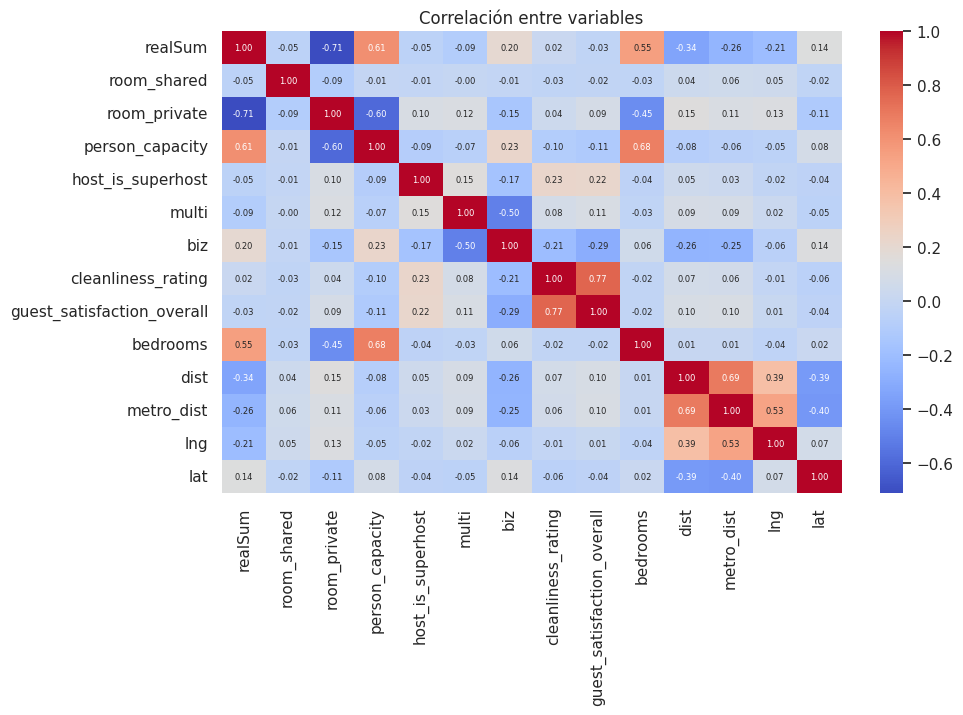

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(filtered_data.corr(numeric_only=True),cmap="coolwarm",annot=True,annot_kws={"size": 6},fmt=r".2f",ax = ax)
plt.title('Correlación entre variables')

A destacar de la figura anterior:

*   Como es de esperarse la correlación entre la la capacidad y la cantidad de habitaciones es alta y por lo tanto podemos descartar una de ellas. Descartaremos el numero de habitaciones debido a que su corelación con el precio es menor
*   Las variables que más corelación tienen con el precio serian, la capacidad de personas, la distancia al centro, el condicional de si la habitación es privada

Pero además, nosotros conocemos debido a los analisis previos que la variable categórica "Room type" afecta significativamente el precio así que tambien la incluiremos en nuestros análisis predictivos.


# **Análisis de datos**
---


### **1.1. Análisis de regresiones**
---



Desarrollemos entonces un modelo de regresión usando las variables que hemos identificado como relevantes

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Copiar los datos
filtered_data2 = filtered_data.copy()

# Convertir booleanos a enteros
filtered_data2['room_private'] = filtered_data2['room_private'].astype(int)
filtered_data2['multi'] = filtered_data2['multi'].astype(int)

# Crear dummies para room_type (evitando multicolinealidad)
dummies = pd.get_dummies(filtered_data2['room_type'], prefix='room_type')

# Unir dummies al dataset original
filtered_data_encoded = pd.concat([filtered_data2, dummies], axis=1)

# Asegurar que todas las columnas predictoras sean numéricas
for col in ['room_type_Private room', 'room_type_Shared room','room_type_Entire home/apt']:
    if col in filtered_data_encoded.columns:
        filtered_data_encoded[col] = filtered_data_encoded[col].astype(int)

# Definir variables independientes (X) y dependiente (y)
X = filtered_data_encoded[['person_capacity', 'dist'
# , 'room_type_Private room'
,'room_type_Entire home/apt'
# , 'room_type_Shared room'
                        ]]
y = filtered_data_encoded['realSum'].astype(float)

# Agregar constante al modelo
X = sm.add_constant(X)

# Ajustar modelo de regresión
model = sm.OLS(y, X).fit()

# Mostrar resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                realSum   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     2341.
Date:                Wed, 11 Jun 2025   Prob (F-statistic):               0.00
Time:                        22:23:15   Log-Likelihood:                -25754.
No. Observations:                4132   AIC:                         5.152e+04
Df Residuals:                    4128   BIC:                         5.154e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Según los resultados de la regresión, el valor de R-squared indica que el modelo explica el 63% de la variabilidad en los precios, lo que sugiere un buen ajuste para un modelo lineal considerando que se estimó con un número limitado de variables.

El p-valor asociado con el modelo revela que las variables son altamente significativas, menores a 0,05, lo que permite rechazar la hipótesis nula y concluir que todos los coeficientes son significativamente diferentes de cero.

Por otro lado, la kurtosis indica que la distribución presenta colas más pesadas, lo que sugiere la presencia de valores extremos o alta varianza en los datos.

Este seria el modelo que describe el precio del airbnb

\begin{align*}
\widehat{\text{realSum}} =\ & 198.90\ +\ 46.252 \cdot \text{person\_capacity} \\
& - 17.78 \cdot \text{dist} \\
& + 215.43 \cdot \text{room\_type\_Entire\ home/apt} \\
\end{align*}


### **1.2. Interpretación de Resultados y conclusiones**
---


Se observa que el modelo incluye múltiples variables que resultan estadísticamente significativas, lo que se convierte en una herramienta econométrica confiable capaz de explicar aproximadamente el 63% de la variación en los precios de alojamiento en la ciudad de Londres. Entre los principales hallazgos del modelo se destacan:
1.	Cuando todas las variables independientes son cero, el valor estimado de la variable dependiente (realSum) es de 198,9 euros.
2.	Por cada incremento en la capacidad de personas (person_capacity), el precio del alojamiento aumenta en promedio 46 euros, manteniendo constantes las demás variables.
3.	Por cada kilómetro adicional de distancia al centro de la ciudad, el valor de realSum disminuye en 17.7 euros, ceteris paribus.
4.	Si el alojamiento corresponde a un Tipo Casa-Completa, el precio promedio aumenta en 215 euros en comparación con las demas categorias, manteniendo las demás condiciones constantes.

***video de youtube***

https://www.youtube.com/watch?v=hZoP8hVMvU4

# **Modelos Machine learning**
---

## Enfoque del Problema

El problema que estamos abordando pertenece a la categoría de **modelos de aprendizaje supervisado**, ya que contamos con la **etiqueta de los datos**, que en este caso es la variable objetivo **`RealSum`**.

Este problema se abordó desde dos perspectivas: **regresión** y **clasificación**.

### Clasificación

Para aplicar modelos de clasificación, se creó una nueva columna binaria que indica si un alojamiento es **costoso (`1`)** o **no costoso (`0`)**, según un umbral definido. A partir de esta nueva variable, se entrenaron los modelos correspondientes.

### Regresión

En el enfoque de regresión, se utilizó directamente la variable **`RealSum`** como objetivo para predecir el precio real del alojamiento. Además, se realizó una búsqueda de hiperparámetros utilizando **`GridSearchCV`** para optimizar el rendimiento de los modelos regresivos.


### **1.1. LogisticRegression**
---

#### ***Preprocesamiento***

---

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

filtered_data3 = filtered_data2.copy()

filtered_data3['room_type_Entire home/apt'] = (filtered_data3['room_type'] == 'Entire home/apt').astype(int)
filtered_data3['is_expensive'] = (filtered_data3['realSum'] > filtered_data3['realSum'].median()).astype(int)
# print(filtered_data3['is_expensive'] )

X = filtered_data3.drop(['realSum', 'is_expensive', 'room_type'], axis=1)
y = filtered_data3['is_expensive']

#escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#codificar
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

#Entrenar
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)



#### ***Crear Variable Objetivo***

---

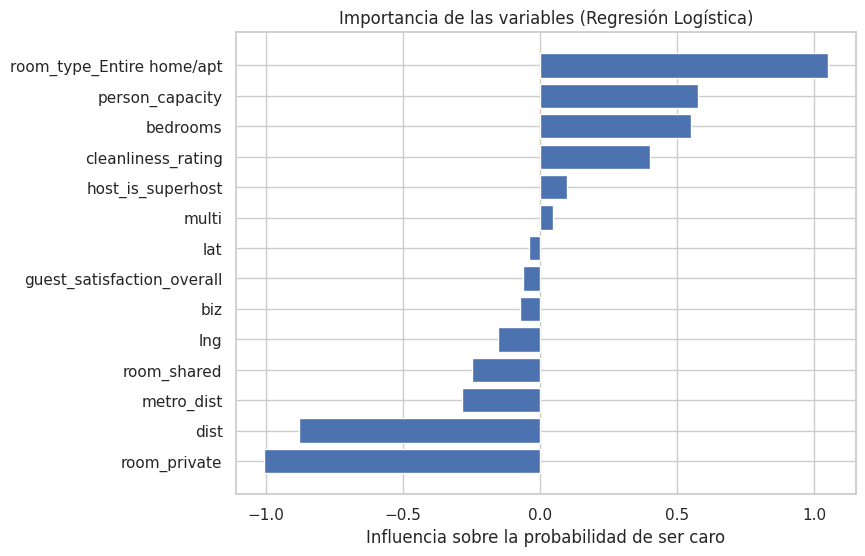

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Crear modelo
log_reg = LogisticRegression(C=1.0, random_state=42)

# Entrenar
log_reg.fit(X_train, y_train)
# Coeficientes del modelo
coef = log_reg.coef_[0]
features = X.columns
# features = X_train.columns

coef_df = pd.DataFrame({'Feature': features, 'Coeficiente': coef})
coef_df = coef_df.sort_values(by='Coeficiente', ascending=False)

# Graficar
plt.figure(figsize=(8,6))
plt.barh(coef_df['Feature'], coef_df['Coeficiente'])
plt.xlabel('Influencia sobre la probabilidad de ser caro')
plt.title('Importancia de las variables (Regresión Logística)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

se puede identificar que las variables que más influyen en el precio caro son

- `room_type_entire home/apt`
- `person_capacity`
- `bedrooms`



In [ ]:
filtered_data2.groupby('room_private')['realSum'].median()

,realSum
room_private,
0,464.027846
1,175.215786


las `room_private` presentan un precio mediano más bajo que otras, de igual manera ocurre con `dist`

In [ ]:
filtered_data2['is_expensive'] = (filtered_data2['realSum'] > filtered_data2['realSum'].median()).astype(int)
print(filtered_data2['is_expensive'] )

0       1
1       1
2       1
3       0
4       1
       ..
4609    1
4610    1
4611    0
4612    1
4613    1
Name: is_expensive, Length: 4132, dtype: int64


Se convierten los valores de precio en una variable binaria que me identifique:

- 1 si es más caro que la mediana
- 0 si no

In [ ]:
filtered_data2.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat,is_expensive
0,570.098074,Entire home/apt,False,0,2.0,False,0,False,10.0,98.0,1,5.301018,1.588990,-0.16032,51.46531,1
1,297.984430,Private room,False,1,2.0,True,1,False,10.0,99.0,1,2.198946,0.379262,-0.09683,51.50343,1
2,336.790611,Private room,False,1,2.0,False,1,False,10.0,96.0,1,2.322958,0.453178,-0.10554,51.52407,1
3,226.722171,Private room,False,1,2.0,True,1,False,10.0,99.0,1,5.707825,1.723977,-0.16575,51.46292,0
4,256.355982,Private room,False,1,3.0,False,0,False,9.0,98.0,1,3.257945,0.825417,-0.12055,51.53728,1


#### ***Entrenar Logistic Regression***

---

In [ ]:
from sklearn.linear_model import LogisticRegression

# Crear modelo
log_reg = LogisticRegression(C=1.0, random_state=42)

# Entrenar
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

#### ***Hacer predicciones***

---

In [ ]:
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]  # Probabilidad de ser caro

#### ***Aplicar umbral personalizado (donde la precisión y el umbral se cruzan)***

---

In [ ]:
umbral = 0.35
y_pred = (y_proba >= umbral).astype(int)

#### ***Evaluación del modelo***

---

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Matriz de confusión
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

# Reporte de clasificación
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.8572580645161291
Matriz de confusión:
 [[514  86]
 [ 91 549]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       600
           1       0.86      0.86      0.86       640

    accuracy                           0.86      1240
   macro avg       0.86      0.86      0.86      1240
weighted avg       0.86      0.86      0.86      1240



con el umbral ajustado a 0,35 me indica que el modelo presenta un equilibrio para detectar alojamientos caros y no caros, presenta:
- `85,7%` de clasificación correcta de los casos.
- el valor de `86%` del recall, indica que detecta bien ambos tipos.
- la precisión pareja indica que el modelo no esta sesgado hacia ninguna clase.
- el F1-score es alto, lo que indica un buen balance entre precisión y recall.

Comparado con el umbral inicial disminuyó los falsos positivos.




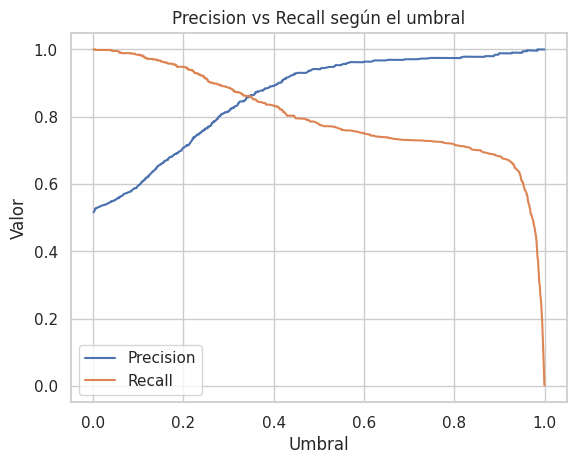

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Umbral')
plt.ylabel('Valor')
plt.title('Precision vs Recall según el umbral')
plt.legend()
plt.grid(True)
plt.show()

Como el objetivo es tener un equilibrio entre precisión y recall, buscaremos el umbral donde ambas curvas se cruzan o estan cercanas

In [ ]:
# Calcular diferencias
import numpy as np

diff = np.abs(precision[:-1] - recall[:-1])
best_idx = np.argmin(diff)
best_threshold = thresholds[best_idx]

print(f"Umbral óptimo por equilibrio precision/recall: {best_threshold:.2f}")

Umbral óptimo por equilibrio precision/recall: 0.35


con este valor mejorará los valores de falsos positivos, manteniendo precisión en los valores de mayor costo, este valor lo reemplazo en

> Aplicar umbral personalizado



#### ***Visualización***

---

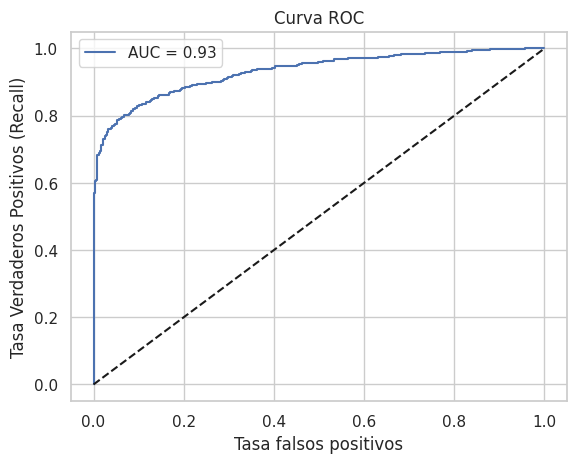

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilidades predichas para la clase positiva
y_proba = log_reg.predict_proba(X_test)[:, 1]

# Calcular ROC curve y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Graficar
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0,1], [0,1], 'k--')  # Línea diagonal
plt.xlabel('Tasa falsos positivos')
plt.ylabel('Tasa Verdaderos Positivos (Recall)')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()

El modelo de clasificar si un alojamiento es caro o no es muy bueno al separar clases.
en la medida que se ajusta el umbral, el modelo logra capturar la mayoria de los verdaderos positivos sin generar muchos falsos positivos.
el Área bajo la curva de 0,93 indica un modelo casi perfecto.


### **1.2. K-means**
---

#### ***Crear Variable Objetivo***

---

In [ ]:
# Seleccionamos variables numéricas o relevantes
X_Var_pred = filtered_data2[['person_capacity', 'dist',
                    'guest_satisfaction_overall',
                    'bedrooms'
                    ]]
# X = filtered_data3[['room_type_Entire home/apt', 'person_capacity', 'bedrooms', 'dist']]

la intención es agrupar alojamientos similares en sus caracteristicas, para nuestro ejercicio elegimos `person_capacity`, `dist`, `guest_satisfaction_overall`, `bedrooms`


---





#### ***Preprocesamiento***

---

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt # Import matplotlib for plotting

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_Var_pred)

#### ***Determinar numero de clusters K con metodo del codo***

---

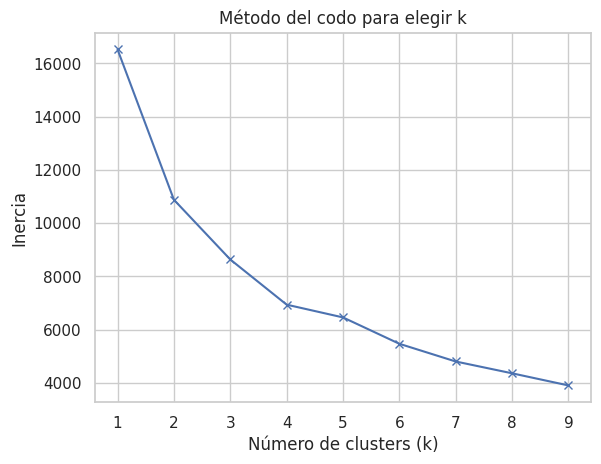

In [ ]:
inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para elegir k')
plt.show()

la caida de la inercia es más lento en el numero de cluster 4

#### ***Entrenar Modelo K-means***

---

In [ ]:
from sklearn.cluster import KMeans

# Elegimos el número de clusters (ejemplo: 3)
k = 4 #modificado por el metodo del codo
kmeans = KMeans(n_clusters=k, random_state=42)

# Entrenar (ajustar) el modelo
kmeans.fit(X_scaled)

# Obtener etiquetas de clusters para cada muestra
labels = kmeans.labels_

#### ***Visualización***

---

In [ ]:
filtered_data2['cluster'] = labels

# Ver cantidad de muestras por cluster
print(filtered_data2['cluster'].value_counts())

cluster
0    2091
1    1169
3     645
2     227
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np

# Supongamos que tienes los datos originales en filtered_data3 con las variables que usaste en X
# Y labels con la asignación de clusters

numeric_cols = filtered_data2.select_dtypes(include=[np.number]).columns

# Calcular centroides (media) de cada cluster
centroids = filtered_data2.groupby('cluster')[numeric_cols].mean()

print(centroids)

            realSum  room_private  person_capacity     multi  \
cluster                                                        
0        295.316706      0.681492         2.481110  0.268771   
1        197.825715      0.818648         2.259196  0.334474   
2        327.082591      0.506608         2.867841  0.180617   
3        585.556371      0.062016         4.922481  0.231008   

         cleanliness_rating  guest_satisfaction_overall  bedrooms      dist  \
cluster                                                                       
0                  9.262076                   91.948350  1.004782  3.882389   
1                  9.505560                   94.668948  1.018820  8.393793   
2                  6.572687                   58.171806  1.105727  5.059052   
3                  9.182946                   91.032558  2.089922  5.193715   

         metro_dist       lng        lat  is_expensive  cluster  
cluster                                                          
0       

Se identifica que las variables clave son el precio, capacidad, ubicación, limpieza y satisfacción del cliente, las cuales presentan mayor variabilidad:
- Cluster 0: agrupa alojamientos con precio medio, buena ubicación al centro y limpieza con capacidad moderada.
- Cluster 1: Son alojamientos Baratos, con baja capacidad de personas, ubicados en zonas alejadas del centro y con buena calidad.
-Cluster 2: Presentan rating bajos de limpieza y satisfacción, precios medio-alto.
-Cluster 4: Segmento premium, Son grandes y caros, con buena calidad de limpieza, y ubicación media.

##### ***Capacidad de personas vs. distancia***

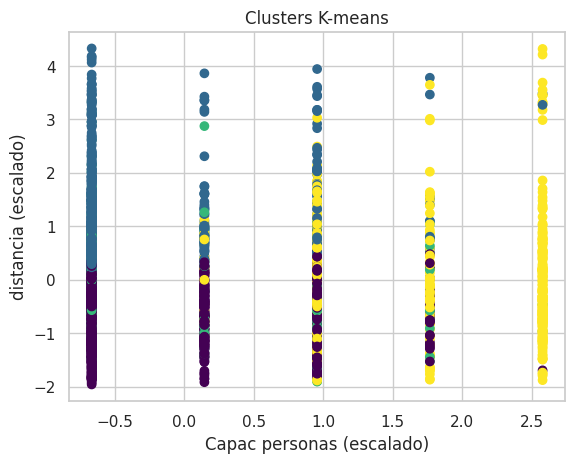

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.xlabel('Capac personas (escalado)')
plt.ylabel('distancia (escalado)')
plt.title('Clusters K-means')

plt.show()

Según la gráfica, los cluster formados por K-means son influenciados por la `capacity_person`, ya que los grupos se agrupan por columnas verticales.

Se observa que para alojamientos con capacidad de una persona, la distancia si influye en la asignación de cluster.

el alojamiento con una capacidad de cinco personas, los puntos agrupados pertenecen al mismo cluster sin importar su distancia, lo que indica que la capacidad tiene mayor peso que la ubicación para determinar el cluster.

### **1.3. Gaussian Naives Bayes**
---

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Suponiendo que ya tienes X (características) y y (variable objetivo)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_Var_pred)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predicción
y_pred = gnb.predict(X_test)

# Evaluación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.93      0.77       600
           1       0.89      0.54      0.67       640

    accuracy                           0.73      1240
   macro avg       0.77      0.73      0.72      1240
weighted avg       0.77      0.73      0.72      1240



### 1.4 DecisionTreeRegressor



In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
#datos
X = filtered_data.drop(columns='realSum')
y = filtered_data['realSum']
#Realizamos train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=45)
#hacemos un preprocesamiento de los datos
categoricas= ['room_type']
numericas= ['person_capacity','dist']
tf = ColumnTransformer([('onehot',OneHotEncoder(),categoricas),
                        ('scaler',StandardScaler(),numericas)])
# Ajuste y transformación solo del set de entrenamiento
X_train_preprocessed = tf.fit_transform(X_train)
X_test_preprocessed = tf.transform(X_test)
# modelo
y=filtered_data['realSum']
model=DecisionTreeRegressor()
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
param_grid={'max_depth':list(range(1,30,5)),
            'min_samples_split':[2,5,10],
            'min_samples_leaf':[1,2,4],
            'max_features':[None, 'sqrt','log2',0.8]}
grid_tree= GridSearchCV(model,
                        param_grid=param_grid,
                        return_train_score=True,
                        cv=5,
                        scoring='neg_mean_squared_error')
grid_tree.fit(X_train_preprocessed,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 6, 11, 16, 21, 26],
                         'max_features': [None, 'sqrt', 'log2', 0.8],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print('mejores hiperparametros:', grid_tree.best_params_)
y_pred = grid_tree.predict(X_test_preprocessed)
mse = mean_squared_error(y_test,y_pred)
print("RMSE en test:", sqrt(mse))

mejores hiperparametros: {'max_depth': 6, 'max_features': 0.8, 'min_samples_leaf': 4, 'min_samples_split': 10}
RMSE en test: 120.7690786720483


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

R²: 0.6549112140124767


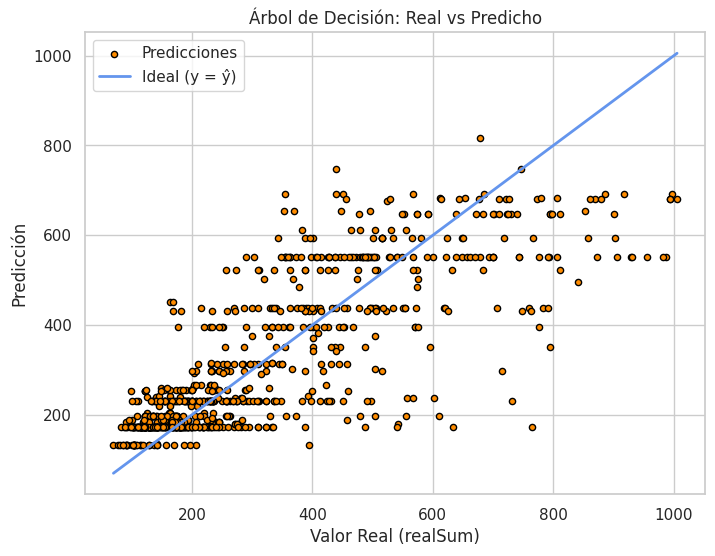

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, s=20, edgecolor="black", c="darkorange", label="Predicciones")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="cornflowerblue", label="Ideal (y = ŷ)", linewidth=2)
plt.xlabel("Valor Real (realSum)")
plt.ylabel("Predicción")
plt.title("Árbol de Decisión: Real vs Predicho")
plt.legend()
plt.grid(True)
plt.show()

### 1.5 Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor(random_state=45)
param_grid={'max_depth':list(range(1,30,5)),
            'min_samples_split':[2,5,10],
            'min_samples_leaf':[1,2,4],
            'max_features':[None, 'sqrt','log2',0.8]}
grid_tree= GridSearchCV(rf,
                        param_grid=param_grid,
                        return_train_score=True,
                        cv=5,
                        scoring='neg_mean_squared_error')
grid_tree.fit(X_train_preprocessed,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=45),
             param_grid={'max_depth': [1, 6, 11, 16, 21, 26],
                         'max_features': [None, 'sqrt', 'log2', 0.8],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
print('mejores hiperparametros:', grid_tree.best_params_)
y_pred = grid_tree.predict(X_test_preprocessed)
mse = mean_squared_error(y_test,y_pred)
print("RMSE en test:", sqrt(mse))

mejores hiperparametros: {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}
RMSE en test: 117.84459250193794


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

R²: 0.6714218664365428


### 1.6 Redes neuronales

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=45, max_iter=300)  # max_iter puede ajustarse
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50,50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001]
}
grid_tree= GridSearchCV(mlp,
                        param_grid=param_grid,
                        return_train_score=True,
                        cv=5,
                        scoring='neg_mean_squared_error')
grid_tree.fit(X_train_preprocessed,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=300, random_state=45),
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                         'solver': ['adam', 'lbfgs']},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_tree.best_params_

{'activation': 'relu',
 'alpha': 0.001,
 'hidden_layer_sizes': (50,),
 'solver': 'lbfgs'}

In [ ]:
y_pred = grid_tree.predict(X_test_preprocessed)

rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE en test:", rmse)

RMSE en test: 117.11525727557941


In [ ]:
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

R²: 0.6754763933391952


### **2. Comparación de modelos**
---

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd


# Variables predictoras y objetivo
X_Var_pred1 = filtered_data2[['person_capacity', 'dist',
                    'guest_satisfaction_overall', 'bedrooms']]
y = filtered_data2['is_expensive']

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_Var_pred1)

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Modelos
log_reg = LogisticRegression(random_state=42)
gnb = GaussianNB()

# Entrenamiento
log_reg.fit(X_train, y_train)
gnb.fit(X_train, y_train)

# Predicciones
y_pred_logreg = log_reg.predict(X_test)
y_pred_gnb = gnb.predict(X_test)

# Reportes
print("=== Regresión Logística ===")
print(classification_report(y_test, y_pred_logreg))

print("=== Gaussian Naive Bayes ===")
print(classification_report(y_test, y_pred_gnb))

=== Regresión Logística ===
              precision    recall  f1-score   support

           0       0.72      0.84      0.78       600
           1       0.83      0.69      0.75       640

    accuracy                           0.77      1240
   macro avg       0.77      0.77      0.77      1240
weighted avg       0.78      0.77      0.77      1240

=== Gaussian Naive Bayes ===
              precision    recall  f1-score   support

           0       0.65      0.93      0.77       600
           1       0.89      0.54      0.67       640

    accuracy                           0.73      1240
   macro avg       0.77      0.73      0.72      1240
weighted avg       0.77      0.73      0.72      1240



Conclusión comparación modelos de clasificación supervisada:
- La regresión logistica presenta un mayor porcentaje de clasificaciones correctas con una exactitud del `77%`. presenta mayor exactitud, F1-score y mejor balance.
- El modelo Naive Bayes tiene `recall` muy alto por lo que detecta muy bien los "no caros". pero su precisión es baja al detectar los caros, a diferencia de la regresión logistica.





Conclusión para modelos de regresión:

- El modelo DecisionTreeRegressor presenta un R² de `0.665`.

- El modelo RandomForestRegressor presenta un R² de `0.67`, ligeramente mejor que el modelo DecisionTreeRegressor bajo la misma semilla y con hiperparámetros similares.

- Finalmente, el modelo de redes neuronales obtuvo un rendimiento similar al de Random Forest, con un R² de `0.675`